# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```

1. Vul de maatbeker met 500ml water, maak gebruik van de weegschaal.
2. Meet de begintemperatuur m.b.v. de thermometer. Noteer deze waarde (+reken om naar Kelvin) en noem hem T0
3. Sluit de verwarmingselement aan op de DC power supply.
4. Zet de DC power supply op 10 volt en 2 ampere
5. Zet het verwarmingselement in het water.
6. Hou de thermometer in het water.
7. Zet de roermachine aan 
8. Zet vervolgens de DC power supply aan, en noteer om de 10 seconden de temperatuur die de thermometer aan geeft, noem deze T1, T2, T3 en door tot T6.
9. Zet de roermachine, de dc power supply uit.


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [1]:
# Hier de data en de analyse
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

volume = 0.5 #L
massa = 0.5 #kg
volt = 10 #V
ampere = 1 #A
temp = np.array([17.1, 17.5, 17.8, 18.3, 18.6, 19.2, 19.5]) + 273.15 #K
tijd = np.array([0,10,20,30,40,50,60]) #s

vermogen = volt * ampere #W
dtijd = tijd[6]-tijd[0]
dtemp = temp[6]-temp[0]

warmte = vermogen * dtijd
c = warmte / (massa * dtemp)

print("De soortelijke warmtecapaciteit van water is",np.round(c),"J/kg.K")

De soortelijke warmtecapaciteit van water is 500.0 J/kg.K


De soortelijke warmtecapaciteit van water is 501.3774177257804 +/- 9.299663804610148 J/kg.K


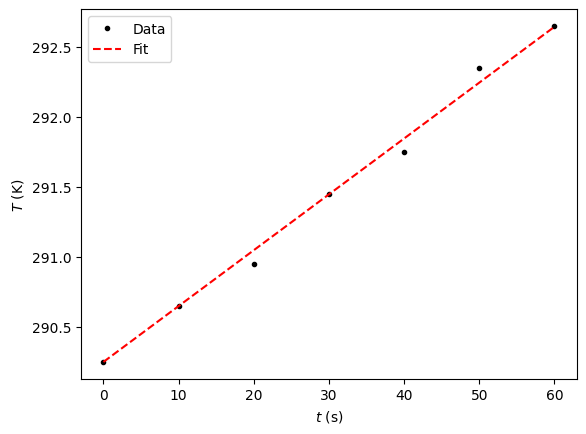

In [8]:
def fitfunc(x,a):
    global vermogen
    global massa
    global temp
    return ((vermogen * x) / (a * massa)) + temp[0]

var, cov = curve_fit(fitfunc,tijd,temp)

print("De soortelijke warmtecapaciteit van water is",var[0],'+/-',np.sqrt(cov[0][0]),"J/kg.K")

x_fit = np.linspace(0,60,1000)
y_fit = fitfunc(x_fit, *var)

plt.figure()
plt.plot(tijd,temp,"k.",label="Data")
plt.plot(x_fit,y_fit,"r--",label="Fit")
plt.xlabel("$t$ (s)")
plt.ylabel("$T$ (K)")
plt.legend
plt.savefig("cwater.png", dpi=450)
plt.show()

In [3]:
# Sla figuren op met  
# 
# plt.savefig("figures/naam.png", dpi=450)


# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.